# Super Store Sales Analysis
<span style="font-size:13pt;">
This is a quick sales analysis to give a quick snapshot of what kind of products are being sold, if they are profitable and where profits are coming from. We'll identify order volume, sales and profits in different categories as well as different regions across the United States to see if there are any relations. If possible, we can identify any opportunities to increase sales and profits and any trends that exists in the dataset. This will be an informal analysis with the limited data that is provided. The analysis will also focus on data visualizations using python and their packages

# Reading in the Data

In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import date

data = pd.read_csv('../input/superstore-sales/superstore.csv',parse_dates=['Order Date','Ship Date'])
data['days_between_shipment'] = abs(data['Ship Date'] - data['Order Date']).values
data['order_year'] = data['Order Date'].dt.year; data['ship_year'] = data['Ship Date'].dt.year
data['order_month'] = data['Order Date'].dt.month; data['ship_month'] = data['Ship Date'].dt.month


quarter_dict = {
                1:'Q1', 2:'Q1', 3:'Q1'
                ,4:'Q2', 5:'Q2', 6:'Q2'
                ,7:'Q3', 8:'Q3', 9:'Q3'
                ,10:'Q4', 11:'Q4', 12:'Q4'
                }

data['quarter_order'] = data['order_month'].map(quarter_dict)
data['quarter_ship'] = data['ship_month'].map(quarter_dict)

print(data.head(5))

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-12-06 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-11-10 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-11-10 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ... Quantity  \
0      Claire Gute   Consumer  United States        Henderson  ...        2   
1      Claire Gute   Consumer  United States        Henderson  ...        3   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...        2   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...        5   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...        2   

   Discount    Profit days_between_shipment order_

<span style="font-size:13pt;">
Fantastic! Our data was read in with no issue. I was able to review the excel version of the dataset and found that the dates were not all in the same format. I chose to parse the dates on the read-in line and add in a few columns such as the "month”, “year" of both order and ship date along with the difference between the two dates. I also added the quarter [Q1, Q2, Q3, Q4] for each date type (order date and ship date). This will make evaluating the data over time easier in the analysis. Let's take a quick look into what kind of descriptive statistics we can pull

In [2]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,days_between_shipment,order_year,ship_year,order_month,ship_month
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,59 days 20:53:33.127876726,2015.722233,2015.737442,7.174605,7.291575
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,74 days 20:50:47.672104104,1.123555,1.126141,3.428273,3.395129
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0 days 00:00:00,2014.000000,2014.000000,1.000000,1.000000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,4 days 00:00:00,2015.000000,2015.000000,4.000000,4.000000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,6 days 00:00:00,2016.000000,2016.000000,8.000000,8.000000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,120 days 00:00:00,2017.000000,2017.000000,10.000000,10.000000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,322 days 00:00:00,2017.000000,2018.000000,12.000000,12.000000


<span style="font-size:13pt;">
Based on the snapshot above, we can see that minimum profits are actually losses, lowest being around -6600 and highest profit being around 8400 and the standard deviation of 234.26. The mean profits are 28.65.
The earliest year is 2014 and latest year is 2017 for orders as expected. What is very unusual is the number of days between order date and ship date. The average is 59 days while the fastest they shipped out was same day and highest was 322 days. Let’s check how "full" our dataset is.


In [3]:
print(data.isnull().sum())

Row ID                   0
Order ID                 0
Order Date               0
Ship Date                0
Ship Mode                0
Customer ID              0
Customer Name            0
Segment                  0
Country                  0
City                     0
State                    0
Postal Code              0
Region                   0
Product ID               0
Category                 0
Sub-Category             0
Product Name             0
Sales                    0
Quantity                 0
Discount                 0
Profit                   0
days_between_shipment    0
order_year               0
ship_year                0
order_month              0
ship_month               0
quarter_order            0
quarter_ship             0
dtype: int64


<span style="font-size:13pt;">
Great to see that there are no null values in our dataset. 

# Visualization

<span style="font-size:13pt;">
There is so much we can gather from the data tables. If we are able to see the total volume count of different variables we can identify groups that we can drill down on to see how products are doing. We can start by looking at Categories, Segments, Cities and State. Let’s see if we can identify any trends in our dataset. We'll be looking more into the orders rather than the ship date for this analysis

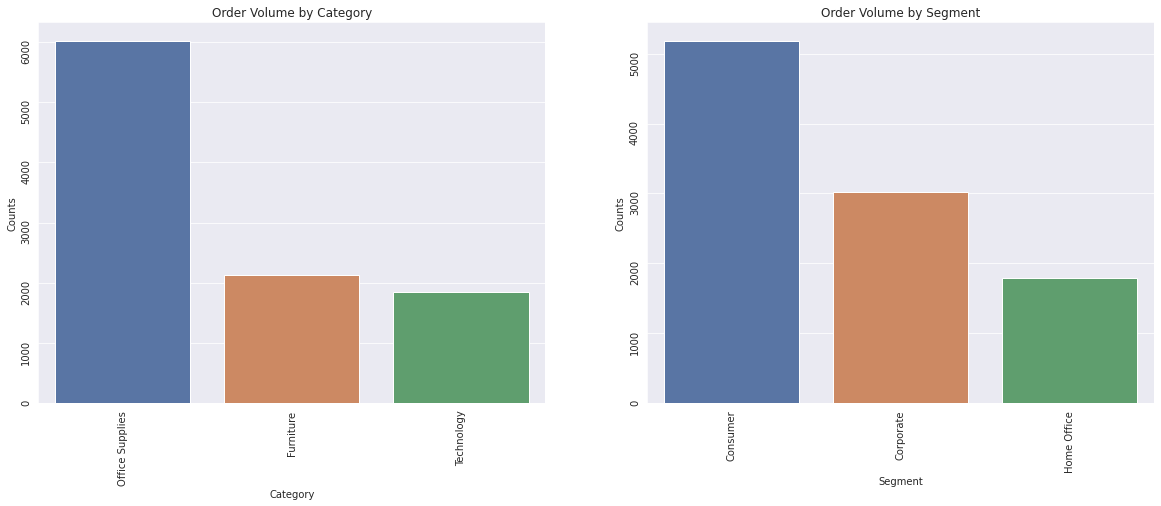

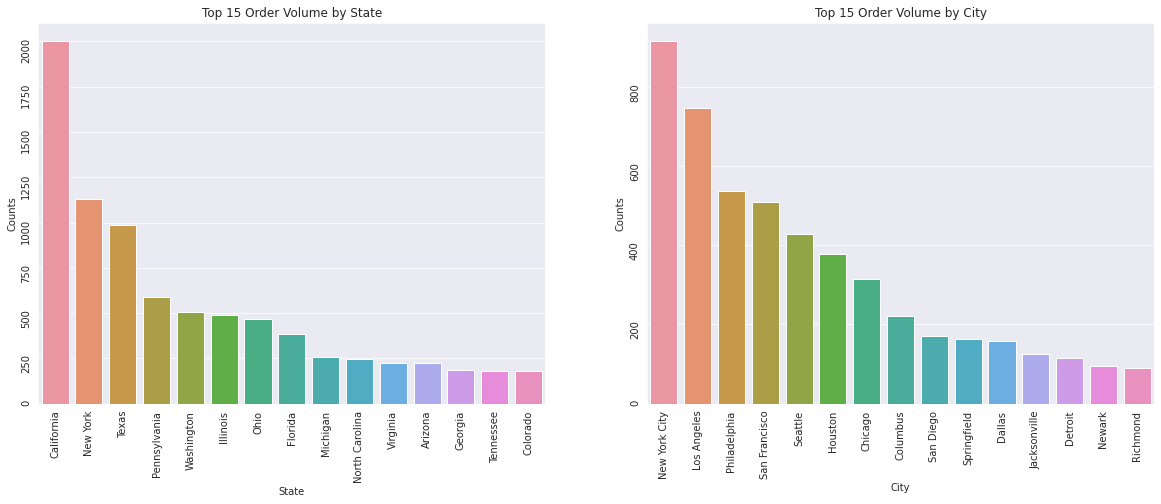

In [4]:
sb.set_style("darkgrid")
sb.set_palette("deep")

def counts_category(data,colname,title1,colname2,title2):
    """
    Function will subset the data frame by the two column names provided and then 
    sort values based on column name and get the top 15 results. Two seaborn bar plot will be made
    as a result
    """
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,7))
    col_counts = data[[colname,'Order Date']].groupby(colname).count().sort_values('Order Date', ascending=False).head(15).reset_index(drop=False)
    col_counts.columns = [colname,'Counts']
    ax[0] = sb.barplot(data=col_counts, x=colname , y='Counts',ax=ax[0])
    ax[0].set_title(title1); ax[0].tick_params(labelrotation=90)

    col_counts2 = data[[colname2,'Order Date']].groupby(colname2).count().sort_values('Order Date', ascending=False).head(15).reset_index(drop=False)
    col_counts2.columns = [colname2,'Counts']
    ax[1] = sb.barplot(data=col_counts2, x=colname2 , y='Counts', ax=ax[1])
    ax[1].set_title(title2); ax[1].tick_params(labelrotation=90)
    return

counts_category(data,'Category','Order Volume by Category','Segment','Order Volume by Segment')
counts_category(data,'State','Top 15 Order Volume by State','City','Top 15 Order Volume by City')


<span style="font-size:13pt;">
We can see from the above charts that office supplies have the highest order count followed by furniture and technology. Does that mean that profits would be in that order as well? 
Also we can note that the three main segments that the orders are going to are "Consumers", "Corporate" and "Home Office". Additionally, California is the highest order volume state followed by New York. However, if we look at the city level, New York City is the highest followed by Los Angeles. Does having a larger order volume indicate that specific category/segment will have the highest sales or profits? Let’s take a look at how each category and segment are doing in sales and profits

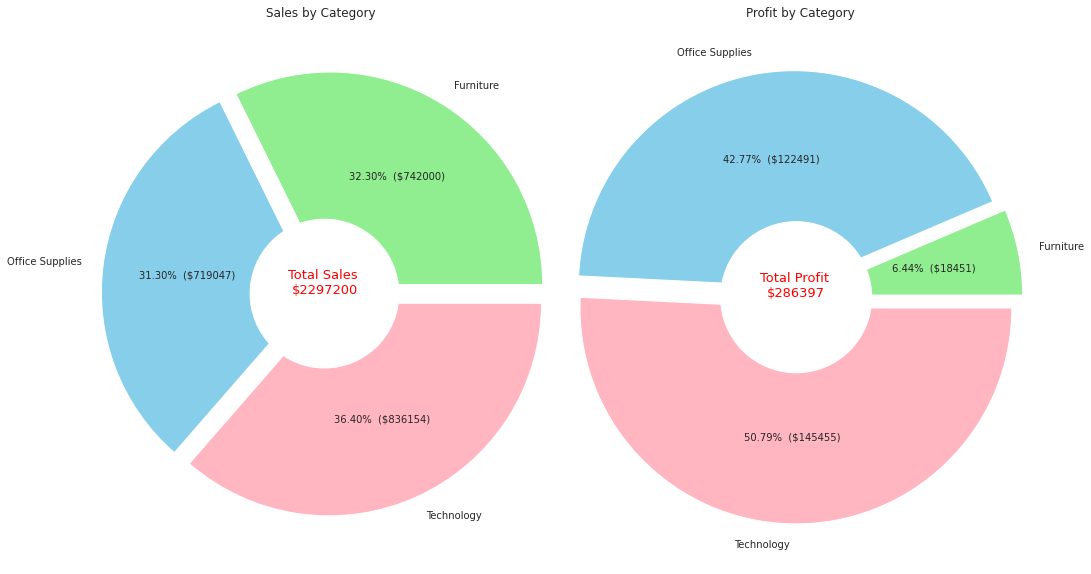

In [5]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  (${v:d})'.format(p=pct,v=val) #get percent format and numerical formats
    return my_autopct

def money_pies(data,colname):
    """
    Function will take in a dataframe with the sum of sales and profits as seprate columns
    and will subset on the category column and output a pie chart of sales and profits 
    on the category criteria with the total sales/profits in the center
    """
    money_list = ['Sales','Profit']
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
    fig.subplots_adjust(top=1)
    colors = ['lightgreen','skyblue','lightpink']
    c = 0
    for mt in money_list:
        ax[c].pie(data[mt], labels=data[colname],autopct=make_autopct(data[mt]),explode=[.05,.05,.05], colors=colors)
        white_circle = plt.Circle((0,0),0.35,fc='white')  # create white circle to place in the center of chart
        ax[c].add_artist(white_circle)
        label = ax[c].annotate('Total '+ mt + ' \n$'+str(data[mt].sum().astype(int)),color = 'red', xy=(0, 0), fontsize=13, ha="center")
        ax[c].set_title(str(mt) + " by " + str(colname))
        ax[c].axis('equal') ; plt.tight_layout()
        fig.subplots_adjust(top=1.1)
        c=c+1
    return
category_profits_sales = (data[['Category','Sales','Profit']].groupby('Category').sum(['Sales','Profit']).reset_index(drop=False))
money_pies(category_profits_sales,'Category')


<span style="font-size:13pt;">
We can see that for the technology category, it produces the most sales and profits, while furniture may have the most sales it is not as profitable as shown in the profits pie chart. While we notice before that "Office Supplies" had the highest order volume, it doesn't necessarily mean that it would be top in sales and profits. This can be due to the fact that technology tends to have a higher profit margin than office supplies. There seems to be something going on in the furniture category where the profits are only 6.44%. Let's keep this in mind for later. Let’s see how each segment is doing in sales and profits

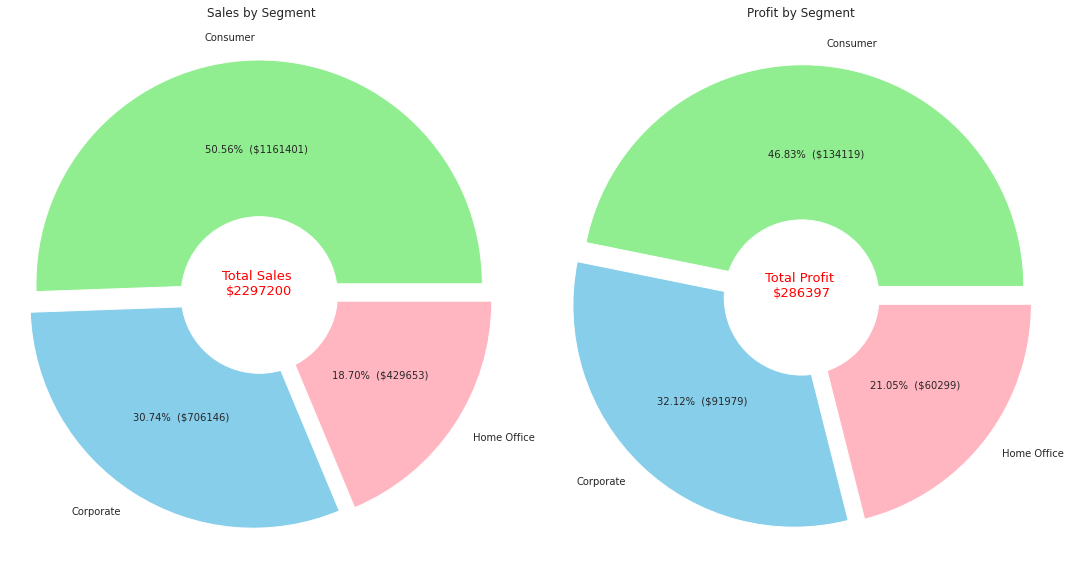

In [6]:
segment_profits_sales = (data[['Segment','Sales','Profit']].groupby('Segment').sum(['Sales','Profit']).reset_index(drop=False))
money_pies(segment_profits_sales,'Segment')

<span style="font-size:13pt;">
It appears that consumers are the biggest cohort that is driving sales and profits, and corporate being second, and home office finally being third. While this data is insightful, we can further evaluate each segment and category over a time series to see how each is performing year over year and if it is profitable. For businesses it is important to see how their products perform over time so they can keep up with the current trends and maximize sales and profits. If a product is not doing well in profits the business may want to cut back in their purchasing of that specific product. While on the opposite side of the spectrum, if a product is doing well in sales and bringing in profits they can choose to have more to meet the demand. Hopefully we can identify some trends that we can help bring to light. Let’s take a look into quarterly sales

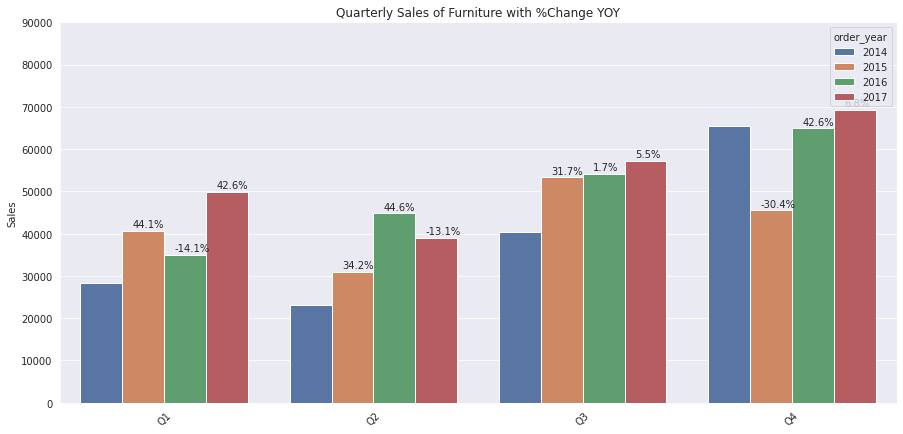

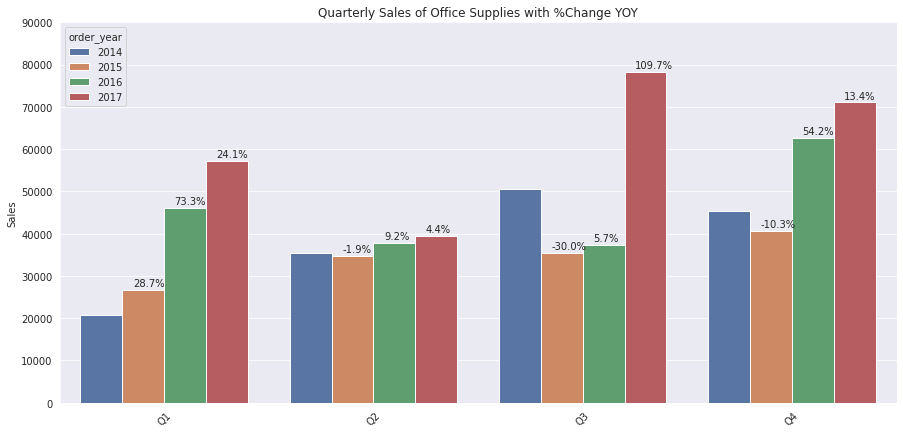

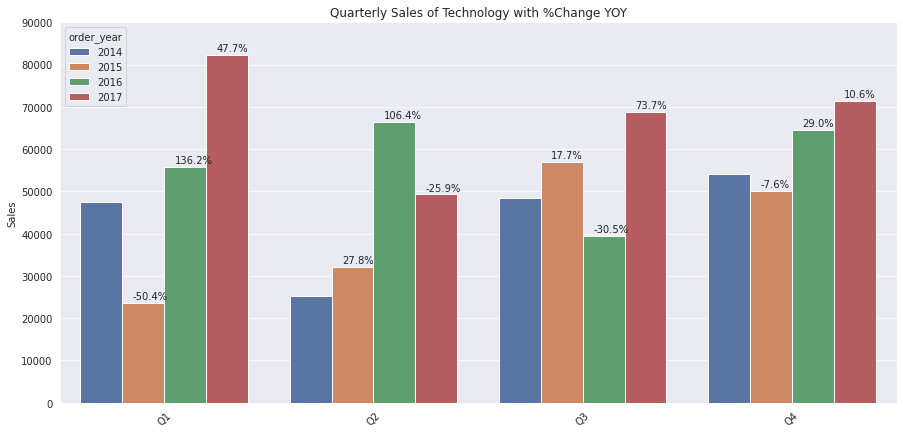

In [7]:
def quarter_money_by_col(data,colname,mt):
    """
    Function will get total profits or sales based on money type (mt) input grouped by the category column name
    and will return the dataset
    """
    prof_data = data[[colname,'order_year', 'quarter_order',mt]].groupby([colname,'order_year','quarter_order']).sum(mt).reset_index(drop=False)
    return prof_data

def prof_perc_calc_years(data,colname,mt):
    """
    Function will calculate the percent profits between 2014 - 2017 per year and will add a column with the percentage from 
    the prior year. Will return the dataset with the new column and a list of percent listing sorted by order year and column name 
    """
    years = [2014,2015,2016,2017]
    data['%Change'] = ''
    for c in (data[colname].unique()):    
        for yr in years:
            if yr == 2014:
                (data.loc[(data[colname]==c) & (data['order_year'] ==yr) ,'%Change']) = 0
            else:
                current_year_value = (data.loc[(data[colname]== c) & (data['order_year'] == yr) ,mt]).values
                last_year_value = (data.loc[(data[colname]== c) & (data['order_year'] == (yr-1)) ,mt]).values
                perc_change = (((current_year_value)-(last_year_value))/last_year_value)*100
                data.loc[(data[colname]==c) & (data['order_year'] ==yr) ,'%Change'] = perc_change 

    data = data.sort_values(['order_year',colname]).reset_index(drop=True)
    perc_values = data['%Change'].values
    return data, perc_values

quarter_data = quarter_money_by_col(data,'Category','Sales')
quarter_data, quarter_perc_values = prof_perc_calc_years(quarter_data,'Category','Sales')

for x in quarter_data['Category'].unique():  
    quarter_sub = (quarter_data.loc[quarter_data['Category']==x].reset_index(drop=True))
    plt.figure(figsize=(15,7)); plt.xticks(rotation=45)
    ax = sb.barplot(data=quarter_sub, x='quarter_order' , y='Sales', hue='order_year')
    ax.set_title("Quarterly Sales of "+ x + " with %Change YOY")
    ax.set_yticks(np.arange(0,100000,10000))
    ax.set_xlabel('')
    quarter_perc_values = quarter_sub['%Change'].values
    for i,p in enumerate(ax.patches):
        if i >3:
            percentage = str(str(round(quarter_perc_values[i],1))+'%')
            width, height = p.get_width(),p.get_height()
            x=p.get_x()+width/2 - 0.05
            y=p.get_y()+height+900
            ax.annotate(percentage,(x,y))


<span style="font-size:13pt;">
Usually businesses review their product sales from a quarter to quarter perspective. This way they can see their product performance throughout the year and their prior quarters. The plot above demonstrates each product category's performance in sales per quarter. Each colored bar represents a different year. It is important to note that 2014 doesn't have a % change because we use this as a baseline to calculate YOY change for the future years.<br>We can note that during the latter half of the year (Q3 & Q4) sales are generally higher. This can coincide with the start of the new fiscal year and the holiday seasons when there is a higher volume of shoppers. In general there Q4 seems to outperform Q1 with the exception of technology in 2017. To me this means that on a per year basis in general that there seems to be a slight uptrend in sales per year in each category. While this is good to know, does this mean the categories are profitable? Let’s take a look into their profits.

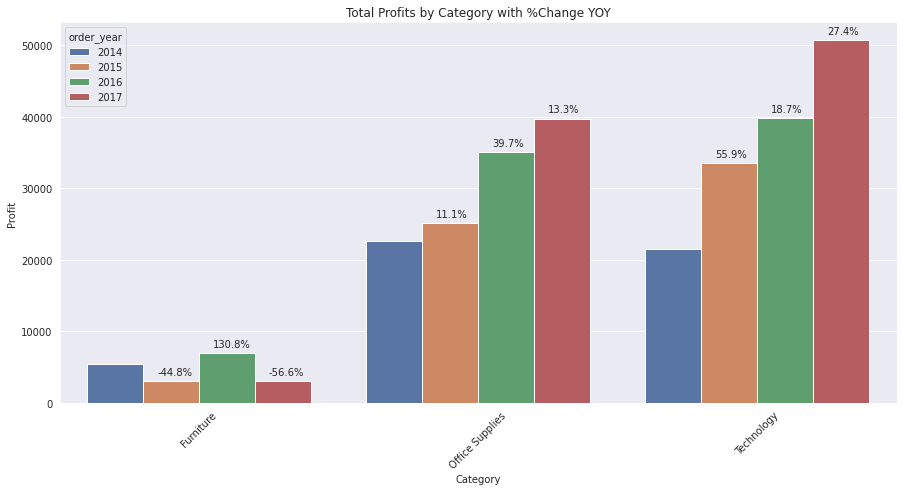

In [8]:
def profits_colname_years(data,colname,title):
    """
    Function will get total profits by column name by year and will create a barplot by column name
    and return the dataset and plt
    """
    prof_data = data[[colname,'order_year', 'Profit']].groupby([colname,'order_year']).sum('Profits').reset_index(drop=False)
    plt.figure(figsize=(15,7)); plt.xticks(rotation=45)
    ax = sb.barplot(data=prof_data, x=colname , y='Profit', hue='order_year')
    ax.set_title(title)
    return prof_data, ax
    
prof_category, ax = profits_colname_years(data,'Category','Total Profits by Category with %Change YOY')
prof_category, perc_values = prof_perc_calc_years(prof_category,'Category','Profit')
#print(prof_category)

for i,p in enumerate(ax.patches):
    if i >2:
        percentage = str(str(round(perc_values[i],1))+'%')
        width, height = p.get_width(),p.get_height()
        x=p.get_x()+width/2 - 0.05
        y=p.get_y()+height+900
        ax.annotate(percentage,(x,y))


<span style="font-size:13pt;">
Based on the above chart, the categories of office supply and technology profits has been consistently rising while the furniture category has not been improving. 
We can see under the office supplies that there have been increases in profits year over year with the biggest jump from 2015 into 2016 with an increase of 39.7%.
While in technology, there have been leaps in profits year over year with the biggest percent increase from 2014 into 2015 with 55.9% increase and another jump of 27.4% from 2016 into 2017.

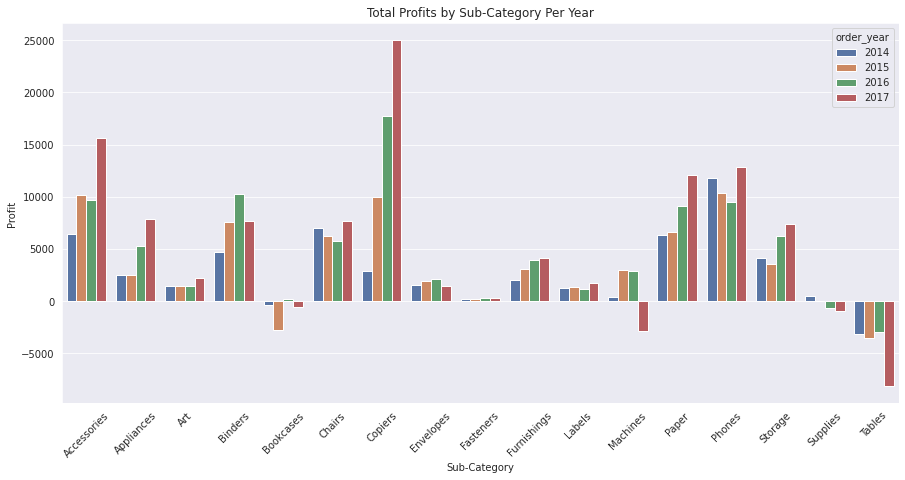

In [9]:
prof_subcategory = profits_colname_years(data,'Sub-Category','Total Profits by Sub-Category Per Year')

<span style="font-size:13pt;">
We can see from the sub-category bar chart that the trend follows what we saw in the overall category. We can see why the furniture category isn't profiting because most of the losses are from tables and bookcases while furniture category items such as chairs and furnishings have been profiting.

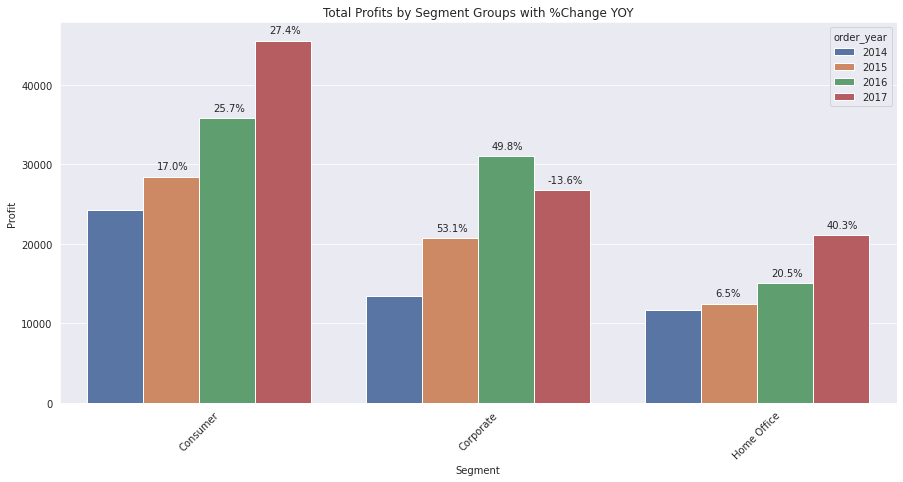

In [10]:
prof_segments, ax = profits_colname_years(data,'Segment','Total Profits by Segment Groups with %Change YOY')
prof_segments, seg_perc_values = prof_perc_calc_years(prof_segments,'Segment','Profit')

for i,p in enumerate(ax.patches):
    if i >2:
        percentage = str(str(round(seg_perc_values[i],1))+'%')
        width, height = p.get_width(),p.get_height()
        x=p.get_x()+width/2 - 0.05
        y=p.get_y()+height+900
        ax.annotate(percentage,(x,y))
#print(prof_segments)        

<span style="font-size:13pt;">
The demographics breakdown of the chart above indicates that consumers are the biggest group that drives profits in the Super store. This also matches previous char that dealt with order volume by segments. We can note that in the corporate segment that there was a steady increase in profits except for the year 2017 where there was a -13.6% decline from the prior year. We then can see that home office segment has been gradually increasing with a bigger increase in 2017. It may be presumptuous to assume that there is a transition from workers in the corporate setting into a home office setting which can be a reason for the decline in profits in the corporate segment. From my understanding the working from home has been steadily increasing in the United States which can be one of the catalyst for more profits in the home office segment. However, I wouldn't be sure if the "Corporate" would need to provide the tools for their workers in their home office.

# Conclusion & Next Steps
<span style="font-size:13pt;">
Based on the given data the most profitable category is technology followed by office supplies. The biggest sales demographics is the consumer segment makes up about half of the sales and profits which was shown by the order volume and also proven again by the profits year over year. We also learned that even though there is a high order volume it doesn't necessarily mean that it will be the most profitable. An example of this is when we saw the order volume of office was much greater than technology and furniture, but once we got to the numbers of sales and profits, technology was actually more profitable. This is because technology has a higher cost average and a bigger profit margin compared to office supplies. We also learned that sales doesn't necessarily mean profits as shown by the comparison of furniture sales and profits.<br>While the consumer segment is very high, there may be an opportunity for an increase in the home office segment due to the new  trend of remote work or working from home. People will would like to purchase items for their home office to get set up and from the current trend in 2021, there seems to be a very large increase of jobs that are remote. Given that this is an old dataset with not much data from 2018 - 2021 it is just an assumption that I'd like to see if it true if I had the data for this. As more people get remote jobs, corporate purchases may decline as their workers are not there. <br> It would be interesting to see how both consumer and home office category is broken down and if there are any overlaps. How would did "SuperStore" distinguish between the two. Another important data point or KPI that wasn't included was customer satisfaction or some type of metric that can tell if the person/group who bought the item was satisfied. It'll be interesting to see if that KPI stands out in either segment or category of product. With this we can identify which segment or product category needs improvement or is outperforming the others. If customer satisfaction was included we could see if Superstore can improve on their times from order date to shipping and see if  that would have an effect. The average calculated overall 4 years was ~59 days which is very unusual. A potential future analysis that can be done is predictive modeling where we can predict future sales based on current data. This can be a separate analysis as I decided this can be an overview of their performance from 2014-2017.
